# PyCaret implementation

In [126]:
from unidecode import unidecode
import pandas as pd

In [127]:
df = pd.read_csv(r"..\CSVs\EditedDataSet_dfShort-cap.csv", encoding="utf-16")

In [128]:
for col in df:
    df.rename(columns = {col:unidecode(col)}, inplace = True)

In [129]:
data = df.sample(frac=0.8).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (609, 7)
Unseen Data For Predictions: (152, 7)


In [130]:
from pycaret.regression import *

exp_reg101 = setup(data = data, target = 'Pret') 

,Description,Value
0,Session id,1353
1,Target,Pret
2,Target type,Regression
3,Original data shape,"(609, 7)"
4,Transformed data shape,"(609, 7)"
5,Transformed train set shape,"(426, 7)"
6,Transformed test set shape,"(183, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [131]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,99560.5763,40234545615.4179,191586.8532,0.7226,0.3515,0.2516,0.0320
rf,Random Forest Regressor,111518.5041,40652571779.1967,192924.4575,0.7204,0.3581,0.2741,0.0330
gbr,Gradient Boosting Regressor,125317.8900,43618652825.9835,202900.0824,0.6985,0.4042,0.3376,0.0140
lightgbm,Light Gradient Boosting Machine,123971.6350,45710024892.3632,205817.8933,0.6863,0.4009,0.3066,0.0510
lasso,Lasso Regression,148183.1016,48516132249.6000,215792.2641,0.6627,0.4985,0.3941,0.0060
ridge,Ridge Regression,148166.3539,48509659750.4000,215782.9531,0.6627,0.4934,0.3938,0.0050
lar,Least Angle Regression,148183.2984,48516178944.0000,215792.3594,0.6627,0.4986,0.3941,0.0050
llar,Lasso Least Angle Regression,148183.1188,48516134092.8000,215792.2719,0.6627,0.4985,0.3941,0.0050
lr,Linear Regression,148183.2758,48516178739.2000,215792.3594,0.6627,0.4986,0.3941,0.0050
en,Elastic Net,148279.6797,48816065945.6000,216489.6234,0.6610,0.4452,0.3880,0.0060


ExtraTreesRegressor(n_jobs=-1, random_state=1353)

In [132]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,141631.9112,70758295786.8399,266004.3154,0.6893,0.3694,0.2200
1,148249.2549,58629490936.4599,242135.2740,0.6696,0.4617,0.3769
2,154887.1833,66986447621.8220,258817.4021,0.4289,0.5130,0.4242
3,95259.0471,20198256556.3622,142120.5705,0.8026,0.2934,0.2111
4,83948.5691,17534138487.5216,132416.5340,0.8803,0.3258,0.2664
5,84257.6955,22447576745.6077,149825.1539,0.8276,0.2784,0.1998
6,100982.4788,32969087075.0627,181573.9163,0.7481,0.3005,0.2582
7,56484.8023,9798995500.6918,98989.8757,0.9385,0.2752,0.2028
8,113752.5610,37068100402.0487,192530.7778,0.6549,0.3344,0.2697


In [133]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,106524.8495,54891535683.3361,234289.4272,0.7590,0.3169,0.1692
1,140857.0849,65238348475.6120,255417.9878,0.6324,0.4659,0.3683
2,142725.5316,58485329149.4573,241837.4023,0.5013,0.4834,0.3808
3,79797.0602,19773326789.3121,140617.6617,0.8067,0.2809,0.1888
4,70804.5930,14906455784.2589,122091.9972,0.8982,0.3124,0.2285
5,74095.6465,20512031614.1137,143220.2207,0.8425,0.2657,0.1887
6,97056.0890,37279659419.5892,193079.4122,0.7152,0.3353,0.2608
7,53464.9419,10955340686.0802,104667.7634,0.9312,0.2757,0.1944
8,104641.8510,36622543444.9342,191370.1739,0.6590,0.3286,0.2501


Tuning the model

In [134]:
tuned_rf = tune_model(rf)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,141519.0334,62423983399.9362,249847.9205,0.7259,0.3267,0.2326
1,168771.5997,65640219819.7972,256203.4735,0.6301,0.4740,0.4231
2,157879.1036,61334553197.5740,247658.1378,0.4771,0.4864,0.4291
3,112859.7120,24712767733.2714,157202.9508,0.7584,0.3340,0.2635
4,93084.4968,19811775747.1651,140754.3099,0.8647,0.3521,0.3118
5,103814.7458,26872802017.2167,163929.2592,0.7937,0.3094,0.2695
6,114705.8029,29612174217.5373,172081.8823,0.7738,0.3505,0.3305
7,83415.6934,15796151540.7165,125682.7416,0.9008,0.3264,0.2885
8,123378.4509,35509460043.2132,188439.5395,0.6694,0.3547,0.3251


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Plot model

In [135]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,156786.0366,65743103974.0632,256404.1809,0.7113,0.3684,0.3030
1,156690.9921,54147310229.6249,232695.7460,0.6949,0.4667,0.4167
2,169737.7487,64402954349.8460,253777.3716,0.4509,0.5123,0.4685
3,116054.4290,25689586644.2224,160279.7138,0.7489,0.3339,0.2595
4,99346.5379,19954947919.1941,141261.9833,0.8637,0.3660,0.3305
5,108761.2493,27040431863.6247,164439.7515,0.7924,0.3188,0.2849
6,121889.4534,33269652648.7603,182399.7057,0.7458,0.3854,0.3915
7,105748.5236,25369829691.3836,159279.0937,0.8407,0.3658,0.3528
8,143445.4133,44617823306.5700,211229.3145,0.5846,0.4004,0.3879


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


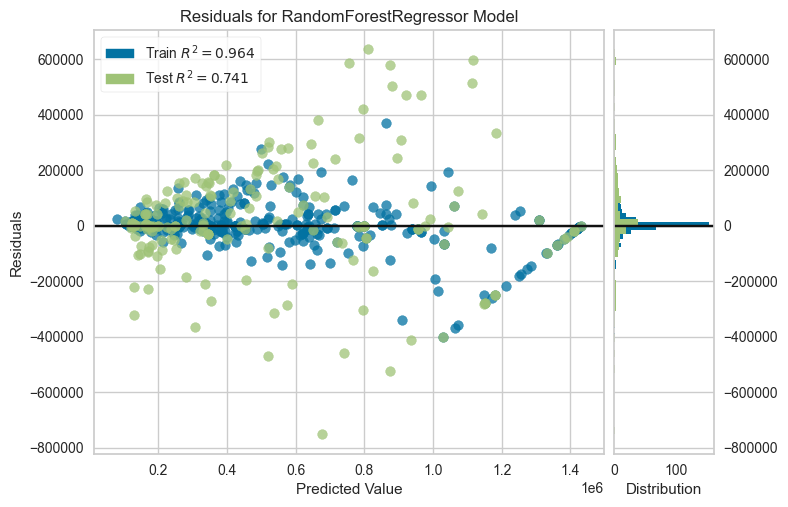

In [136]:
plot_model(tuned_rf)

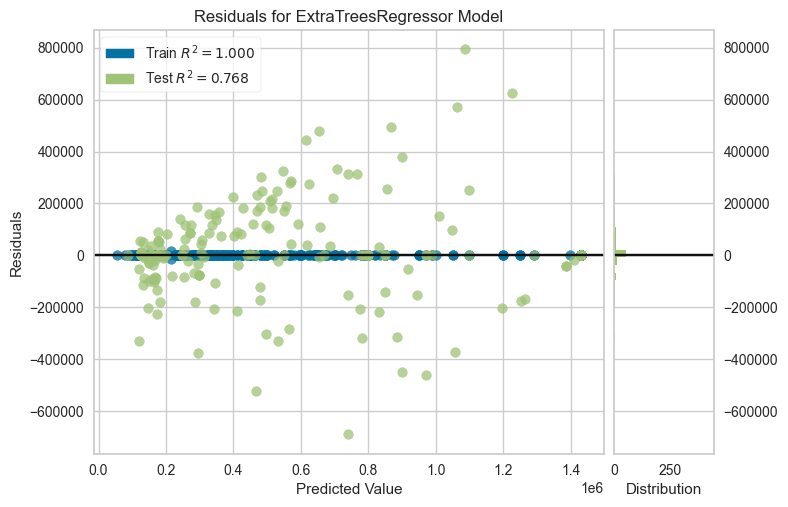

In [137]:
plot_model(tuned_et)

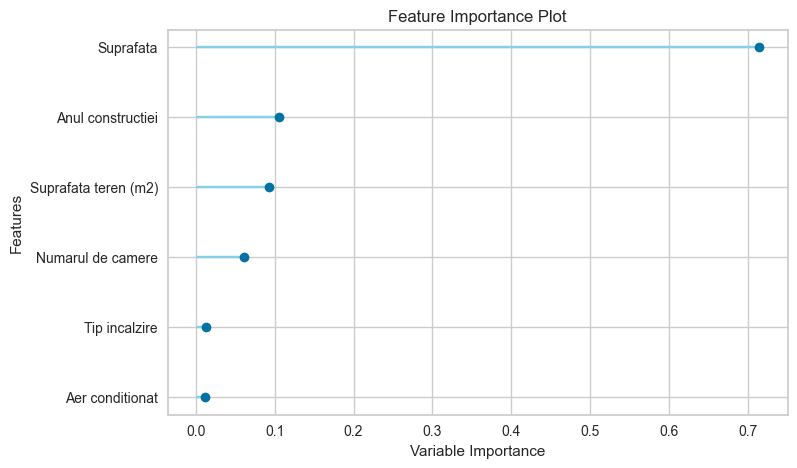

In [138]:
plot_model(tuned_rf, plot='feature')

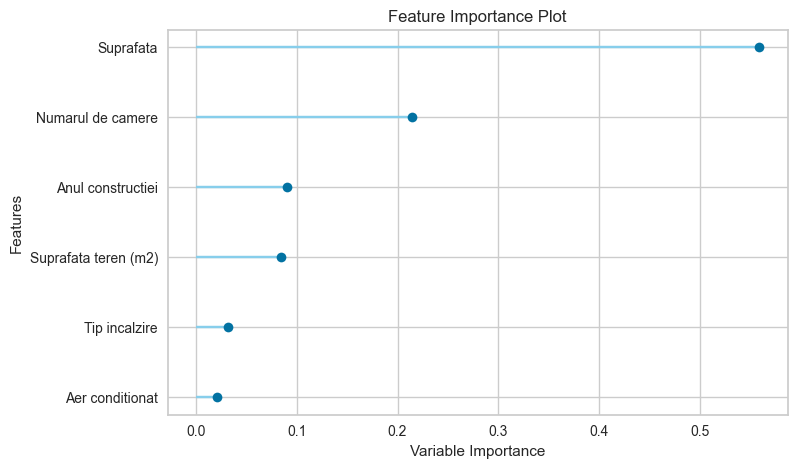

In [139]:
plot_model(tuned_et, plot="feature")

Prediction

In [140]:
predict_model(tuned_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,133963.1157,40965121598.3207,202398.4229,0.7406,0.4394,0.3864


,Suprafata,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
181,550.0,6,380.0,1995.0,10.0,0,375000.0,879666.64
520,657.5,7,640.0,1932.0,10.0,0,1290000.0,1309600.00
194,100.0,7,195.0,1968.0,3.0,0,128000.0,120360.94
540,203.0,6,200.0,2023.0,5.0,0,375000.0,345255.99
419,110.0,6,250.0,2022.0,3.0,1,350000.0,130901.98
...,...,...,...,...,...,...,...,...
464,270.0,6,172.0,2022.0,7.0,1,279999.0,557419.00
393,240.0,6,314.0,1994.0,8.0,0,180000.0,398398.97
382,174.0,2,85.0,2008.0,5.0,1,670000.0,306757.40
377,48.0,16,197.0,1955.0,2.0,0,170000.0,133530.00


In [141]:
predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,123698.6331,36694183796.1109,191557.2598,0.7677,0.4260,0.3601


,Suprafata,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
181,550.0,6,380.0,1995.0,10.0,0,375000.0,867923.28
520,657.5,7,640.0,1932.0,10.0,0,1290000.0,1290000.00
194,100.0,7,195.0,1968.0,3.0,0,128000.0,146989.50
540,203.0,6,200.0,2023.0,5.0,0,375000.0,298560.89
419,110.0,6,250.0,2022.0,3.0,1,350000.0,145591.50
...,...,...,...,...,...,...,...,...
464,270.0,6,172.0,2022.0,7.0,1,279999.0,528381.00
393,240.0,6,314.0,1994.0,8.0,0,180000.0,480345.00
382,174.0,2,85.0,2008.0,5.0,1,670000.0,294754.10
377,48.0,16,197.0,1955.0,2.0,0,170000.0,119164.00


In [142]:
final_rf = finalize_model(tuned_rf)

In [143]:
final_et = finalize_model(tuned_et)

In [144]:
predict_model(final_rf)

,Suprafata,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
181,550.0,6,380.0,1995.0,10.0,0,375000.0,534948.88
520,657.5,7,640.0,1932.0,10.0,0,1290000.0,1292800.00
194,100.0,7,195.0,1968.0,3.0,0,128000.0,127366.00
540,203.0,6,200.0,2023.0,5.0,0,375000.0,370990.00
419,110.0,6,250.0,2022.0,3.0,1,350000.0,272932.50
...,...,...,...,...,...,...,...,...
464,270.0,6,172.0,2022.0,7.0,1,279999.0,348845.39
393,240.0,6,314.0,1994.0,8.0,0,180000.0,272509.99
382,174.0,2,85.0,2008.0,5.0,1,670000.0,528197.70
377,48.0,16,197.0,1955.0,2.0,0,170000.0,158967.00


In [145]:
predict_model(final_et)

,Suprafata,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
181,550.0,6,380.0,1995.0,10.0,0,375000.0,375000.0
520,657.5,7,640.0,1932.0,10.0,0,1290000.0,1290000.0
194,100.0,7,195.0,1968.0,3.0,0,128000.0,128000.0
540,203.0,6,200.0,2023.0,5.0,0,375000.0,375000.0
419,110.0,6,250.0,2022.0,3.0,1,350000.0,350000.0
...,...,...,...,...,...,...,...,...
464,270.0,6,172.0,2022.0,7.0,1,279999.0,279999.0
393,240.0,6,314.0,1994.0,8.0,0,180000.0,180000.0
382,174.0,2,85.0,2008.0,5.0,1,670000.0,670000.0
377,48.0,16,197.0,1955.0,2.0,0,170000.0,170000.0


In [146]:
unseen_predictions = predict_model(final_rf, data = data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,67241.3955,15038929050.7060,122633.3113,0.8664,0.2365,0.1735


,Suprafata,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
0,290.0,7,250.0,2009.0,8.0,0,249900.0,337326.99
1,247.0,7,702.0,2022.0,5.0,0,390000.0,513696.50
2,203.0,6,200.0,2023.0,5.0,0,375000.0,370990.00
3,278.0,6,278.0,2009.0,5.0,1,240000.0,301844.98
4,400.0,6,730.0,2008.0,9.0,0,325000.0,388819.00


In [147]:
unseen_predictions = predict_model(final_et, data = data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,29354.7645,10015314707.2899,100076.5442,0.9110,0.1537,0.0550


,Suprafata,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
0,290.0,7,250.0,2009.0,8.0,0,249900.0,249900.0
1,247.0,7,702.0,2022.0,5.0,0,390000.0,422329.0
2,203.0,6,200.0,2023.0,5.0,0,375000.0,375000.0
3,278.0,6,278.0,2009.0,5.0,1,240000.0,240000.0
4,400.0,6,730.0,2008.0,9.0,0,325000.0,325000.0
